## Análise de Negócios
### Preços dos combustíveis ofertados nos postos

<img src = 'preco_combustivel.jpeg'>

### Fomos contratados por uma Petroleira para construir uma análise de negócios para entender a dinâmica de preços que está sendo ofertado pelos postos.
1 - Teremos que trabalhar com Dados Existentes <br/>
link: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis <br/>
<img src = 'anp.png'><br/>
<br/>
Como foi uma solicitação do nosso cliente, teremos que avaliar os ultimos 5 anos da base de dados.<br/>
<img src = 'tabela_base_dados.png'><br/>

<br/>
Quando abrimos as tabelas nos deparamos que cada semestre possui uma quantidade muito grande de dados, logo juntas 5 anos (10 tabelas) fica difícil!<br/>
<br/>
Como muitas das vezes não temos o Engenheiro de Dados, temos que dar os nossos pulos!<br/>


2 - Armazenar esses dados em um banco de dados <br/>
<img src = 'PostgreSQL-logo.png'><br/>
<img src = 'postgre1.png'><br/>

In [1]:
"""
CREATE TABLE anp.preco_combustivel(
		regiao 				varchar(255)
		,estado				varchar(255)
		,municipio			varchar(255)
		,revenda			varchar(255)
		,cnpj				varchar(255)
		,nome_rua			varchar(255)	
		,numero_rua			varchar(255)
		,complemento		varchar(255)
		,bairro				varchar(255)
		,cep				varchar(255)
		,produto			varchar(255)
		,data_coleta		date
		,valor_venda		float
		,unidade_medida		varchar(255)
		,bandeira			varchar(255)

)
"""

'\nCREATE TABLE anp.preco_combustivel(\n\t\tregiao \t\t\t\tvarchar(255)\n\t\t,estado\t\t\t\tvarchar(255)\n\t\t,municipio\t\t\tvarchar(255)\n\t\t,revenda\t\t\tvarchar(255)\n\t\t,cnpj\t\t\t\tvarchar(255)\n\t\t,nome_rua\t\t\tvarchar(255)\t\n\t\t,numero_rua\t\t\tvarchar(255)\n\t\t,complemento\t\tvarchar(255)\n\t\t,bairro\t\t\t\tvarchar(255)\n\t\t,cep\t\t\t\tvarchar(255)\n\t\t,produto\t\t\tvarchar(255)\n\t\t,data_coleta\t\tdate\n\t\t,valor_venda\t\tfloat\n\t\t,unidade_medida\t\tvarchar(255)\n\t\t,bandeira\t\t\tvarchar(255)\n\n)\n'

Carga de dados no Banco! <br/>
Utilizaremos o Knime<br/>
<img src = 'knime.png'><br/>
<img src = 'knime2.png'><br/>
Para atender as nossas necessidades vamos construir desta forma.<br/>
<img src = 'knime3.png'><br/>

3 - Utilizar esses dados para as nossas análises <br/>

Instalando as bibliotecas

In [2]:
#pip install psycopg2

In [3]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

import warnings
warnings.filterwarnings('ignore')

In [4]:
conn = ps.connect(dbname = 'anp',
                    user ='postgres',
                    password = 'postgres',
                    host = 'localhost',
                    port = '5432' )

In [5]:
sql = """
SELECT * FROM anp.preco_combustivel
"""

In [6]:
df = sqlio.read_sql_query(sql, conn)

Visualizar as 5 primeiras informações

In [7]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GNV,2018-01-02,2.370,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
1,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,DIESEL S10,2018-01-02,3.240,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,ETANOL,2018-01-02,2.930,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,34.274.233/0015-08,RUA EDISTIO PONDE,474,None,STIEP,41770-395,GASOLINA,2018-01-02,3.620,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,2018-01-02,2.699,R$ / m³,BRANCA


In [8]:
print(f'Quantidade de linhas e colunas {df.shape}')

Quantidade de linhas e colunas (4401370, 15)


Tipo das Colunas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401370 entries, 0 to 4401369
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   regiao          object 
 1   estado          object 
 2   municipio       object 
 3   revenda         object 
 4   cnpj            object 
 5   nome_rua        object 
 6   numero_rua      object 
 7   complemento     object 
 8   bairro          object 
 9   cep             object 
 10  produto         object 
 11  data_coleta     object 
 12  valor_venda     float64
 13  unidade_medida  object 
 14  bandeira        object 
dtypes: float64(1), object(14)
memory usage: 503.7+ MB


In [10]:
df['data_coleta']= pd.to_datetime(df['data_coleta'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401370 entries, 0 to 4401369
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   regiao          object        
 1   estado          object        
 2   municipio       object        
 3   revenda         object        
 4   cnpj            object        
 5   nome_rua        object        
 6   numero_rua      object        
 7   complemento     object        
 8   bairro          object        
 9   cep             object        
 10  produto         object        
 11  data_coleta     datetime64[ns]
 12  valor_venda     float64       
 13  unidade_medida  object        
 14  bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 503.7+ MB


Verificar se há nulos nas colunas

In [12]:
df.isnull().sum()

regiao                  0
estado                  0
municipio               0
revenda                 0
cnpj                    0
nome_rua                0
numero_rua           2775
complemento       3354329
bairro              13416
cep                     0
produto                 0
data_coleta             0
valor_venda             0
unidade_medida          0
bandeira                0
dtype: int64

Selecionar as colunas que vamos trabalhar<br/>
regiao, estado, municipio, produto, data_coleta, valor_venda, bandeira

In [13]:
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira','produto', 'valor_venda']]

In [14]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699


In [15]:
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month

In [16]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


Estatística Básica

In [17]:
df_anp.describe().round(2)

,data_coleta,valor_venda,ano,mes
count,4401370,4401370.00,4401370.00,4401370.00
mean,2020-05-29 04:40:07.617629440,4.48,2019.93,6.27
min,2018-01-01 00:00:00,1.76,2018.00,1.00
25%,2019-02-18 00:00:00,3.52,2019.00,3.00
50%,2020-03-25 00:00:00,4.19,2020.00,6.00
75%,2021-10-20 00:00:00,5.20,2021.00,9.00
max,2022-12-30 00:00:00,9.65,2022.00,12.00
std,NaN,1.30,1.45,3.38


Quais são os tipos de produtos que são comercializados?

In [18]:
#Visualizando os valores únicos
print(f'Os produtos conecializados{df_anp.produto.unique()}')

Os produtos conecializados['GNV' 'DIESEL S10' 'ETANOL' 'GASOLINA' 'DIESEL' 'GASOLINA ADITIVADA']


Quais anos estão na Base?

In [19]:
#Visualizando os valores únicos
print(f'Os anos da Base: {df_anp.ano.unique()}')

Os anos da Base: [2018 2019 2020 2021 2022]


Descobrindo os valores mínimos, máximos e médios dos produtos por ano

In [20]:
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']]

In [21]:
df_anp_valor.groupby(['produto','ano']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2018        2.80  5.20  3.50
                   2019        2.87  4.99  3.60
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
DIESEL S10         2018        2.84  5.30  3.59
                   2019        2.79  5.09  3.69
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
ETANOL             2018        1.90  4.98  3.13
                   2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
GASOLINA           2018        3.37  6.29  4.45
                   2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
GNV                2018        1.76  4.10  2.73
                   2019        2.00  4.56  3.22
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04

In [22]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado','valor_venda']]

In [23]:
df_anp_valor_estado.groupby(['produto','ano','estado']).agg(['min', 'max', 'mean']).round(2)

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2018 AC            3.38  4.89  4.29
             AL            3.10  4.23  3.60
             AM            3.09  4.49  3.63
             AP            3.29  4.51  3.88
             BA            2.99  5.20  3.51
...                         ...   ...   ...
GNV     2022 RN            4.11  4.99  4.50
             RS            4.59  6.89  5.88
             SC            4.00  6.89  5.50
             SE            4.47  5.49  4.99
             SP            3.59  6.99  5.22

[727 rows x 3 columns]

Descobrir a quantidade de bandeiras por produto/ano

In [24]:
df_anp_bandeira = df_anp[['ano','bandeira','produto']]

In [25]:
df_anp_bandeira.groupby(['ano','produto']).bandeira.nunique()

ano   produto           
2018  DIESEL                64
      DIESEL S10            66
      ETANOL                66
      GASOLINA              66
      GNV                   24
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                54
      DIESEL S10            54
      ETANOL                55
      GASOLINA              55
      GASOLINA ADITIVADA    54
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
Name: bandeira, dtype: int64

In [26]:
df_anp_bandeira_estado = df_anp[['ano','bandeira','produto', 'estado']]

In [27]:
df_anp_bandeira_estado.groupby(['ano','produto','estado']).bandeira.nunique()

ano   produto  estado
2018  DIESEL   AC         6
               AL         7
               AM         9
               AP         3
               BA        10
                         ..
2022  GNV      RN         5
               RS         6
               SC         8
               SE         5
               SP         7
Name: bandeira, Length: 727, dtype: int64

Criando as visualizações de dados

In [64]:
#graficos
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


In [30]:
df_anp['produto'].unique()

array(['GNV', 'DIESEL S10', 'ETANOL', 'GASOLINA', 'DIESEL',
       'GASOLINA ADITIVADA'], dtype=object)

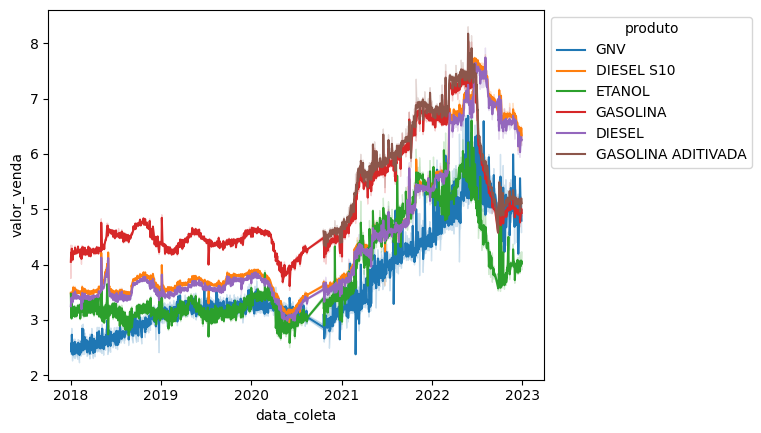

In [31]:
ax = sns.lineplot(data = df_anp, x="data_coleta", y ='valor_venda',   hue="produto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Separando o Dataset para entender um pouquinho melhor a nossa base

In [32]:
#Separando o dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']

Criando funções que auxiliam a plotar gráficos.

In [35]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.boxplot(x=x, y= y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14);

In [36]:
def plotar_boxplot_geral(y, dataset):
    ax = sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)

Analisando os combustíveis

Gasolina Aditivada - 2018/2022

In [37]:
# Estatística básica de cada produto
print('Gasolina Aditivada')
gasolina_aditivada.valor_venda.describe().round(2)

Gasolina Aditivada


count    340489.00
mean          6.19
std           0.94
min           3.46
25%           5.49
50%           6.19
75%           6.92
max           9.28
Name: valor_venda, dtype: float64

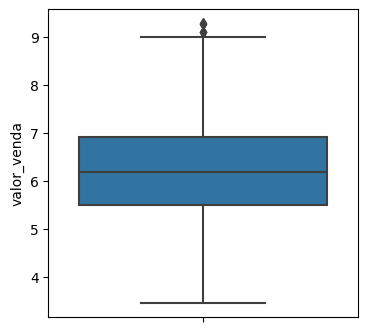

In [38]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)

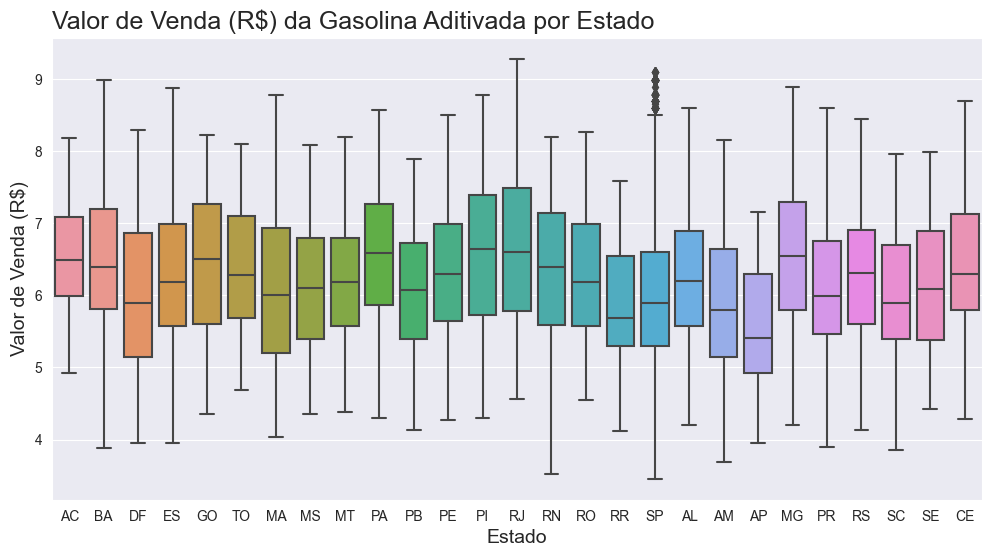

In [40]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gasolina_aditivada)

Gasolina Comum

In [41]:
print('Gasolina Comum')
gasolina.valor_venda.describe().round(2)

Gasolina Comum


count    1247070.00
mean           4.99
std            1.01
min            2.87
25%            4.29
50%            4.65
75%            5.50
max            8.99
Name: valor_venda, dtype: float64

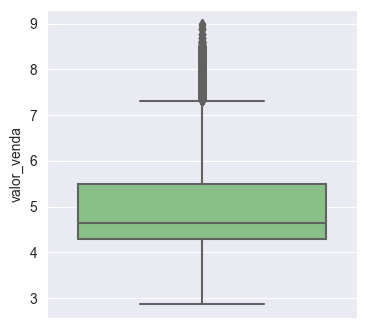

In [42]:
plotar_boxplot_geral('valor_venda', gasolina)

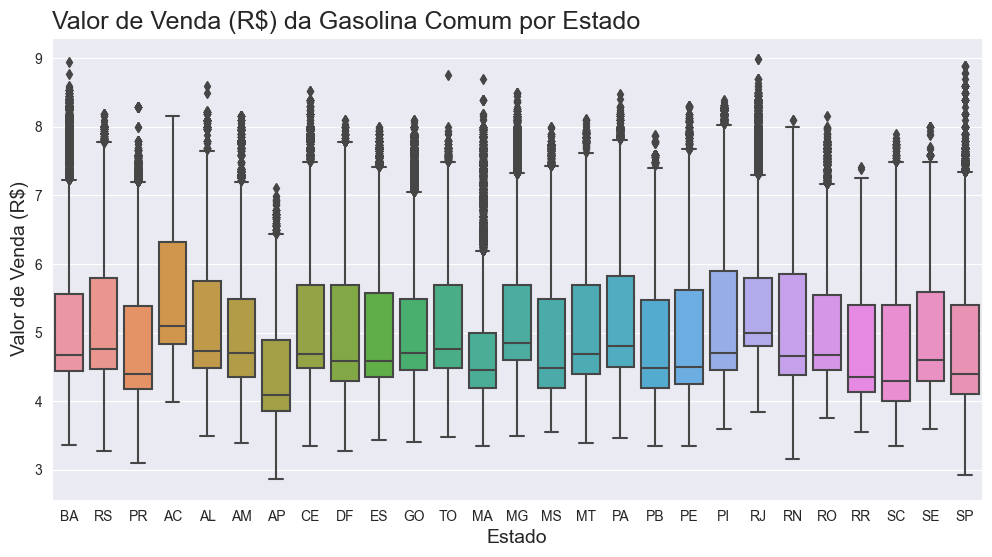

In [43]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Comum por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gasolina)

Diesel S10

In [44]:
print('Diesel S10')
diesel_s10.valor_venda.describe().round(2)

Diesel S10


count    1008641.00
mean           4.37
std            1.27
min            2.46
25%            3.52
50%            3.80
75%            4.80
max            9.65
Name: valor_venda, dtype: float64

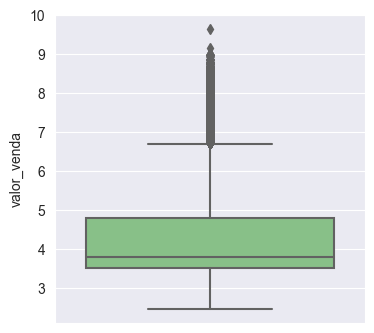

In [45]:
plotar_boxplot_geral('valor_venda', diesel_s10)

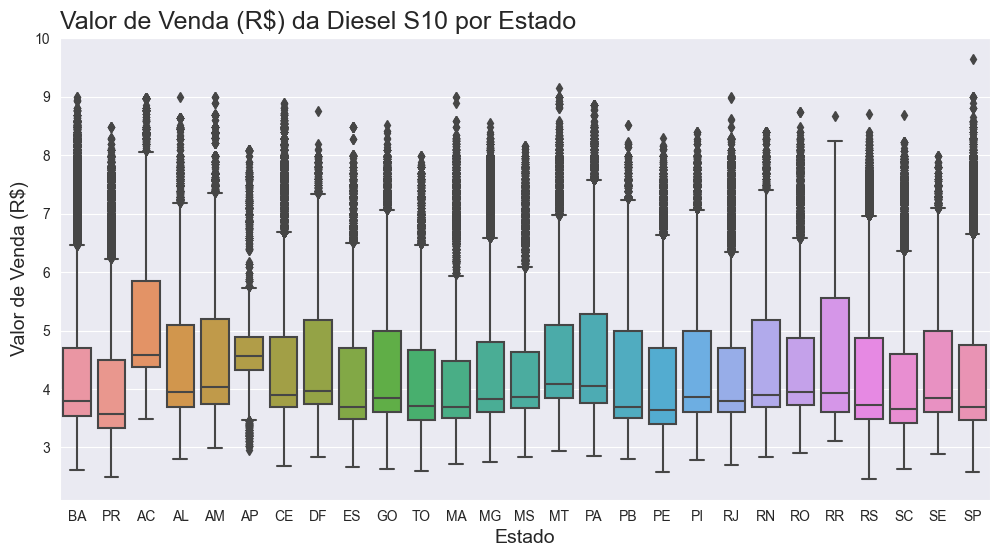

In [46]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel S10 por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        diesel_s10)

In [47]:
#Separando o dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']

Diesel

In [48]:
print('Diesel')
diesel.valor_venda.describe().round(2)

Diesel


count    623737.00
mean          4.20
std           1.23
min           2.45
25%           3.40
50%           3.68
75%           4.52
max           9.00
Name: valor_venda, dtype: float64

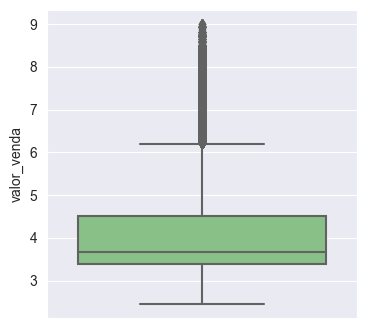

In [49]:
plotar_boxplot_geral('valor_venda', diesel)

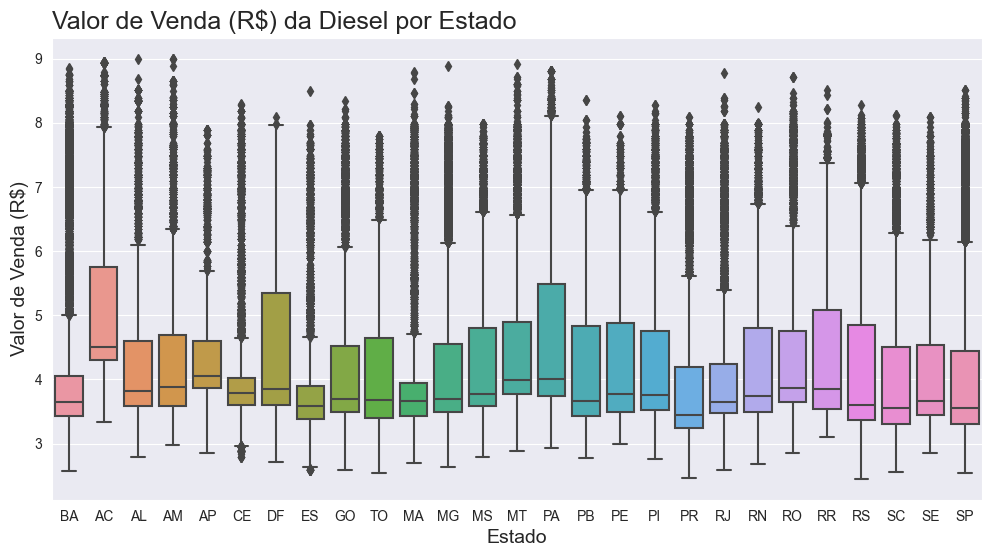

In [50]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        diesel)

Etanol

In [51]:
print('Etanol')
etanol.valor_venda.describe().round(2)

Etanol


count    1105096.00
mean           3.72
std            0.99
min            1.80
25%            2.96
50%            3.49
75%            4.30
max            7.98
Name: valor_venda, dtype: float64

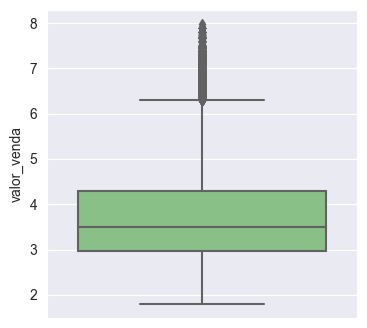

In [52]:
plotar_boxplot_geral('valor_venda', etanol)

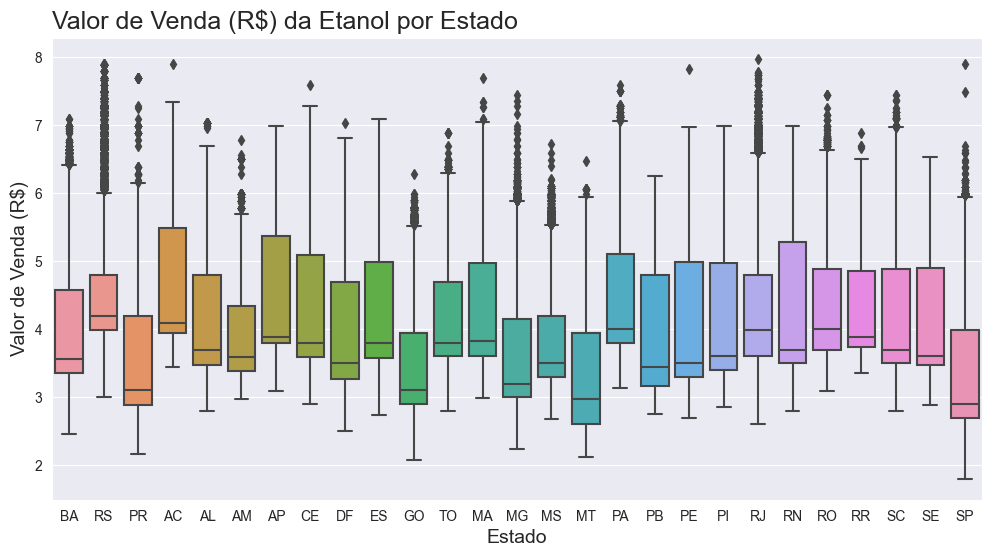

In [53]:
plotar_boxplot_2V('Valor de Venda (R$) da Etanol por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        etanol)

GNV

In [54]:
print('GNV')
gnv.valor_venda.describe().round(2)

GNV


count    76337.00
mean         3.66
std          0.96
min          1.76
25%          2.99
50%          3.39
75%          4.37
max          7.99
Name: valor_venda, dtype: float64

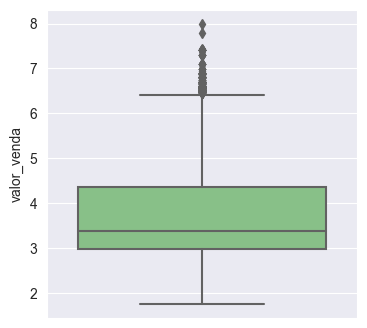

In [55]:
plotar_boxplot_geral('valor_venda', gnv)

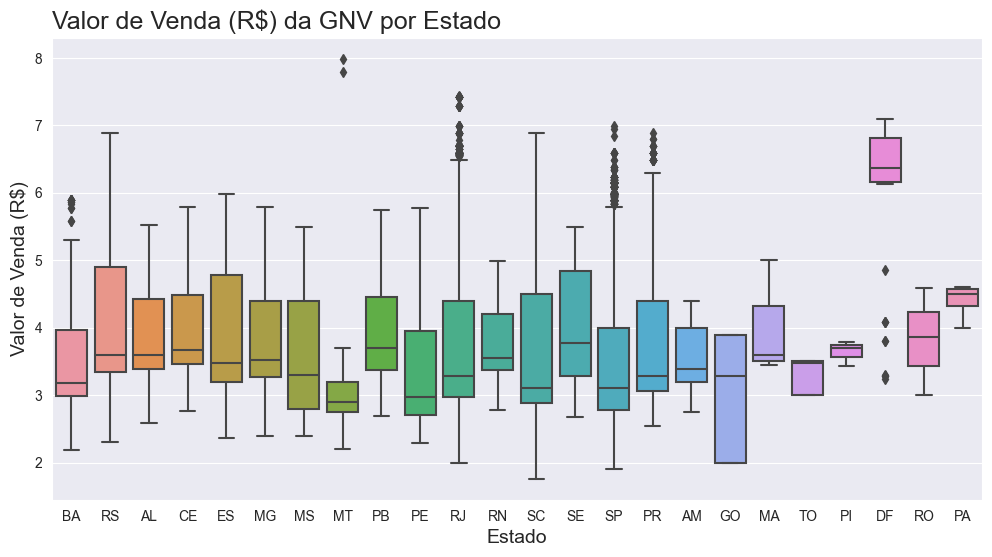

In [56]:
plotar_boxplot_2V('Valor de Venda (R$) da GNV por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gnv)

Quantidade de Bandeiras distribuidoras de combustível

In [57]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.370,2018,1
1,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.240,2018,1
2,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.930,2018,1
3,2018-01-02,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,3.620,2018,1
4,2018-01-02,S,RS,CANOAS,BRANCA,GNV,2.699,2018,1


In [58]:
df_anp['bandeira'].nunique()

85

In [59]:
df_anp['bandeira'].unique()

array(['PETROBRAS DISTRIBUIDORA S.A.', 'BRANCA', 'RODOIL', 'EQUADOR',
       'SABBÁ', 'IPIRANGA', 'RAIZEN', "ATEM' S", 'PETROSERRA', 'ALESAT',
       'HORA', 'PETROBAHIA', 'SP', 'SETTA DISTRIBUIDORA', 'DISLUB',
       'ATLÂNTICA', 'ZEMA', 'RIO BRANCO', 'TDC DISTRIBUIDORA', 'SATELITE',
       'CIAPETRO', 'ALE COMBUSTÍVEIS', 'TAURUS', 'IDAZA', 'PODIUM',
       'WATT', 'SIMARELLI', 'FEDERAL', 'STANG', 'UNI', 'POTENCIAL',
       'CHARRUA', 'MEGAPETRO', 'AMERICANOIL', 'RAIZEN MIME', 'REJAILE',
       'MAXSUL', 'DIBRAPE', 'RUFF C.J.', 'D`MAIS', 'RM PETROLEO',
       'ROYAL FIC', 'TORRAO', 'RZD DISTRIBUIDORA', 'TEMAPE', 'ACOL',
       'MONTEPETRO', 'FAN', 'TOBRAS', 'PETROX DISTRIBUIDORA', 'PETROX',
       'SOLL', 'PETROLUZ', 'LIQUIGÁS', 'POLIPETRO', 'SUL COMBUSTÍVEIS',
       'PELIKANO', 'SMALL', 'DINAMO', 'BREMEN', 'LARCO',
       'MASUT DISTRIBUIDORA', 'ESTRADA', 'WALENDOWSKY', 'GRAN PETRO',
       'SAARA', 'GP', 'REDE SOL', 'AIR BP', '76 OIL', 'TOTAL BRASIL',
       'PR DISTRIBUIDORA', 'TA

In [60]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()

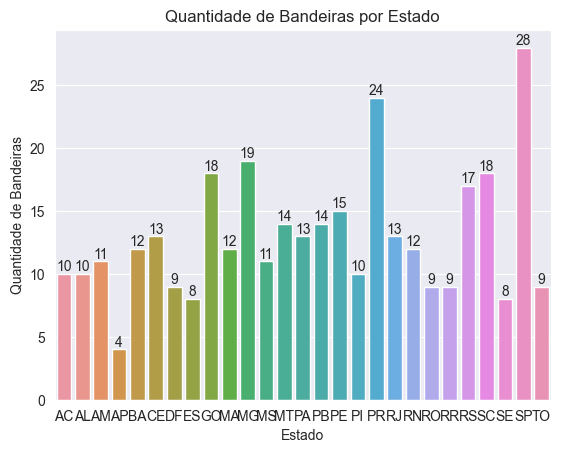

In [63]:

sns.barplot(x='estado', y='bandeira', data=bandeiras_estado)

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()